## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **Business Goal**

**BUSINESS PROBLEM OVERVIEW**


Customer churn prediction is extremely important for any business as it recognizes the clients who are likely to stop using their services.

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyse customer-level data of a leading telecom firm, do exploratory data analysis to identify the main indicators  why customers are leaving the company.


**OBJECTIVE**

Customer churn occurs when customers stop doing business with a company.As the cost of retaining an existing customer is far less than acquiring a new one, maintaining a healthy customer base is important for the success of any business

**The main objective of project is to :**

*	Finding  factors which influence customers to churn.

*	Retain churn customers by applying strategy 

* Providing offers based on influencing factors.

*	Control churn rate and improve their image in the market.


**What is Churn Prediction?**


Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

# **Data Summary**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Capstone project_Exploratory data analysis/Telecom Churn.csv')

In [ ]:
# First look
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
dataset.shape

(3333, 20)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

* **State                :**categorica for the 50 states
 
* **Account Length       :**how long account has been active
 
* **Area Code            :**Code Number of Area having some States included in each area code
 
* **lntl Plan            :**International plan activated ( yes, no )
 
* **VMail Plan           :**voice Mail plan activated ( yes ,no )
 
* **VMail Message        :**No.of voice mail messages
 
* **Day Mins             :**Total day minutes used
 
* **Day calls**         :Total day calls made
 
* **Day Charge**         :Total day charge
 
* **Eve Mins**          :Total evening minutes
 
* **Eve Calls**          :Total evening calls
 
* **Eve Charge**         :Total evening charge
 
* **Night Mins**         :Total night minutes
 
* **Night Calls**        :Total night calls
 
* **Night Charge**      :Total night charge
 
* **Intl Mins**         :Total International minutes used
 
* **Intl Calls**         :Total International calls made
 
* **Intl Charge**        :Total International charge
 
* **CustServ calls**    :Number of customer service caUs made
 
* **Churn**             :Customer churn (Target Variable True=1, False=0)

In [ ]:
print("Columns and data types")
pd.DataFrame(dataset.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
State,object
Account length,int64
Area code,int64
International plan,object
Voice mail plan,object
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64


In [ ]:
dataset.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


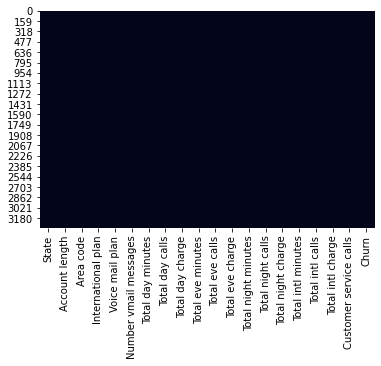

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

In [ ]:
# Checking Duplicate Values
len(dataset[dataset.duplicated()])

0

***There are 3333 rows and 20 columns in above dataset.***


***Above dataset has no missing value.***

***Above dataset has no duplicate value.***


# **Exploratory Data Analysis**

## **Exploring the dependent variable**

In [ ]:
dataset.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

**INTRODUTION** 

Number of Churn customers       =  483   =  (14.5%)

Number of non-Churn (loyal) customers =  2850  =  (85.5%)


In [ ]:
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


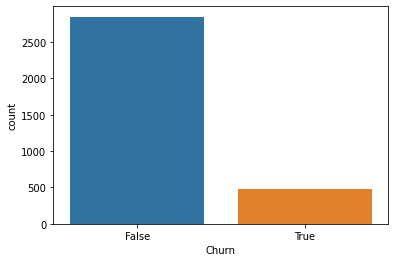

In [ ]:
sns.countplot(x=dataset.Churn)

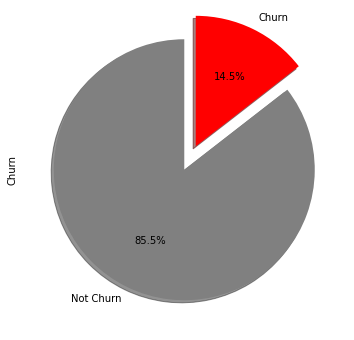

In [ ]:
dataset['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['gray','red'],
                               explode=[0,0.2]
                              )

## **Column wise Analysis**

In [ ]:
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
dataset['State'].nunique()

51

In [ ]:
dataset.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

**State**

There are 51 state who have different churn rate . 

**CA, NJ ,TX , MD ,SC ,MI**  are the ones who have higher churn rate more then 21.74% which is more than 50% of average churn rate.

In [ ]:
dataset['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

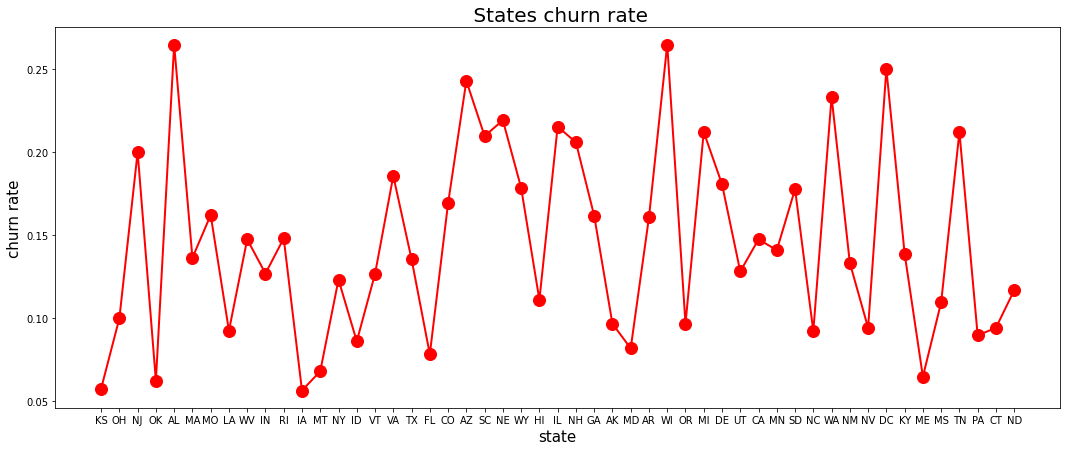

In [ ]:
s1=dataset['State'].unique()
s2=dataset.groupby(['State'])['Churn'].mean()
 
plt.rcParams['figure.figsize'] = (18, 7)
 
plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)
 
plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

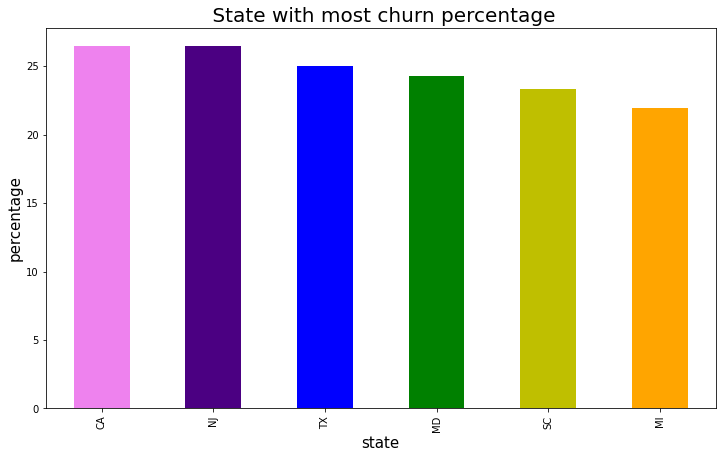

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (12, 7)
 
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby('State')['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

<BarContainer object of 51 artists>

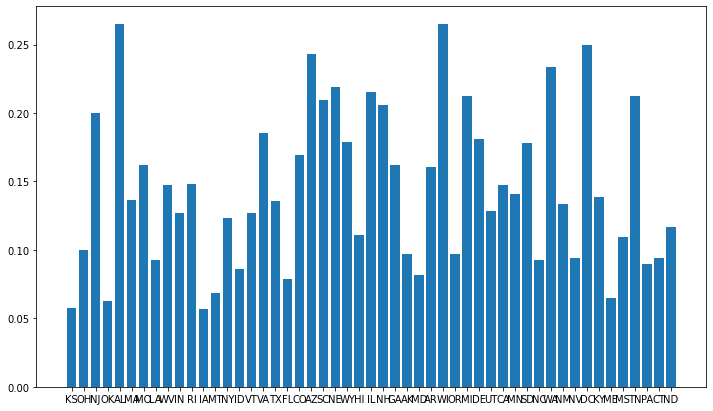

In [ ]:
cc=dataset.groupby(['State'])['Churn'].mean()
plt.rcParams['figure.figsize'] = (12, 7)
plt.bar(dataset['State'].unique(),cc)

**Account Length**

We can catagories Account Length into three catagories like 

**One Digit Length** 

 Churn True -8.3%

 No. of Churn True-2



 Churn False-91.7%

**Two Digit Length**

Churn True -14.0% 

No. of Churn True-225



Churn False-86.0%


**Three Digit Length**

Churn True -15.0% 

No. of Churn True-256



Churn False-85.0%




**REMARK**


AS from the above  record, we can see that Two digit Account Length customers are churning with a number of 225 
And Three digit Account Length customers are churning with a number of 256





In [ ]:
print(dataset['Account length'].value_counts().sort_values(ascending=False))
print(" ")
print(dataset.groupby(['Account length'])['Churn'].value_counts().sort_values(ascending=False))
print(" ")
print(print(dataset.groupby('Account length')['Churn'].mean().sort_values(ascending=False)))

105    43
87     42
93     40
101    40
90     39
       ..
243     1
26      1
4       1
8       1
2       1
Name: Account length, Length: 212, dtype: int64
 
Account length  Churn
87              False    39
90              False    37
86              False    36
101             False    35
105             False    34
                         ..
39              True      1
174             True      1
175             False     1
208             True      1
243             False     1
Name: Churn, Length: 373, dtype: int64
 
Account length
188    1.0
2      1.0
208    1.0
225    0.5
224    0.5
      ... 
31     0.0
30     0.0
192    0.0
194    0.0
243    0.0
Name: Churn, Length: 212, dtype: float64
None


In [ ]:
dataset['Account length'].max()

243

One Digit Account Length

In [ ]:
dataset[dataset['Account length']<=9].loc[:,['Churn']].value_counts()

Churn
False    22
True      2
dtype: int64

In [ ]:
dataset[dataset['Account length']<=9].shape

(24, 20)

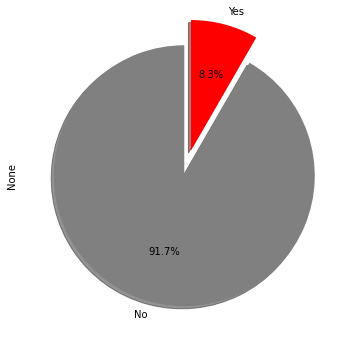

In [ ]:
dataset[dataset['Account length']<=9].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['gray','red'],
                               explode=[0,0.2]
                              )

Two Digit Account Length

In [ ]:
dataset[(dataset['Account length']<=99) & (dataset['Account length']>=10)].loc[:,['Churn']].value_counts()

Churn
False    1378
True      225
dtype: int64

In [ ]:
dataset[(dataset['Account length']<=99) & (dataset['Account length']>=10)].shape

(1603, 20)

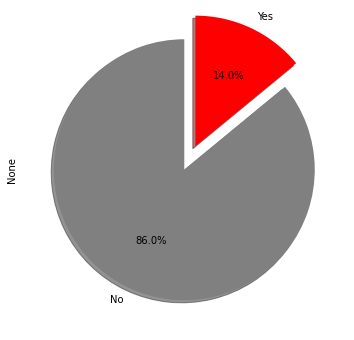

In [ ]:
dataset[(dataset['Account length']<=99) & (dataset['Account length']>=10)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['gray','red'],
                               explode=[0,0.2])

Three Digit Account Length

In [ ]:
dataset[(dataset['Account length']<=dataset['Account length'].max()) & (dataset['Account length']>=100)].loc[:,['Churn']].value_counts()

Churn
False    1450
True      256
dtype: int64

In [ ]:
dataset[(dataset['Account length']<=dataset['Account length'].max()) & (dataset['Account length']>=100)].shape

(1706, 20)

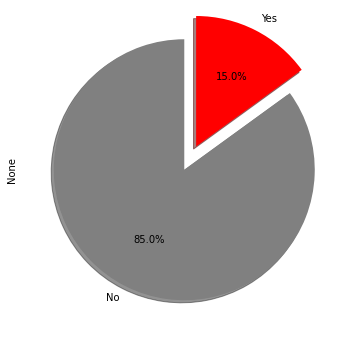

In [ ]:
dataset[(dataset['Account length']<=dataset['Account length'].max()) & (dataset['Account length']>=100)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['gray','red'],
                               explode=[0,0.2])

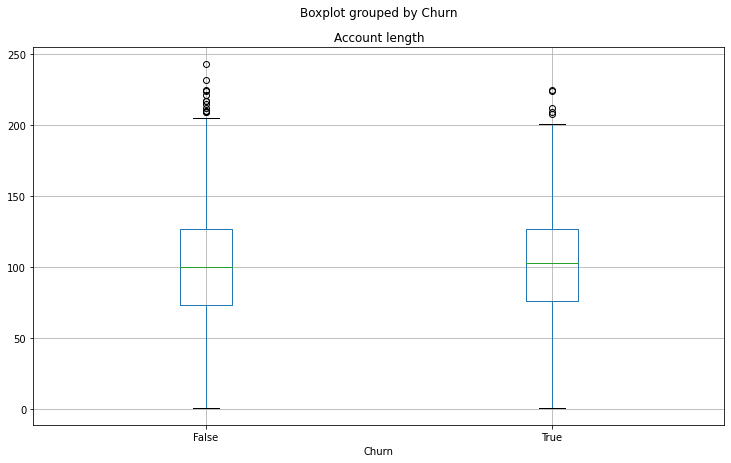

In [ ]:
# Box Plot for Account Length attribute 
dataset.boxplot(column='Account length',by='Churn')

**Area code**

Dosent matter at all as all area have  around 14% churn rate .

In [ ]:
print(dataset['Area code'].value_counts())
print(" ")
print(dataset.groupby(['Area code'])['Churn'].value_counts())
print(" ")
print(print(dataset.groupby('Area code')['Churn'].mean()))

415    1655
510     840
408     838
Name: Area code, dtype: int64
 
Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64
 
Area code
408    0.145585
415    0.142598
510    0.148810
Name: Churn, dtype: float64
None


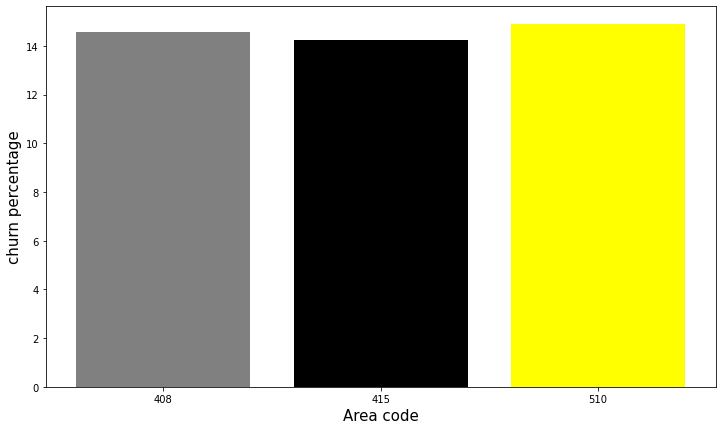

In [ ]:
a1= list(['408','415' , '510'])
b1= dataset.groupby('Area code')['Churn'].mean()*100
plt.bar(a1,b1, color=['gray','black','yellow'])
 
plt.rcParams['figure.figsize'] = (6, 5)
 
 
plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()

**INTERNATIONAL PLAN**

3010 dont have a international plan

323 have a international plan

Among those who  have a international plan 42.4 % people churn.

Whereas among those who dont have a international plan  only 11.4 % people churn.

Among those who  have a international plan their average charge is 2.86 and they talk for 10.7 minutes average .

Whereas among those who dont have a international plan their average charge is 2.75 and they talk for 10.15 minutes average .

The reason why people having international plan might be leaving is that they are [paying same amount of money for international calls as for those customers who dont have a international plan.Hence they arent getting any benefits for having an international plan so they might be unhappy. 

***Customers with the International Plan tend to churn more frequently ***

In [ ]:
print(dataset['International plan'].value_counts())
print(" ")
print(dataset.groupby('International plan')['Churn'].value_counts())
print(" ")
print(" ")
print(dataset.groupby('International plan')['Churn'].mean())
print(" ")
print(dataset.groupby(['International plan'])['Total intl charge'].mean())
print(" ")
print(dataset.groupby(['Churn','International plan'])['Total intl charge'].mean())

No     3010
Yes     323
Name: International plan, dtype: int64
 
International plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64
 
 
International plan
No     0.114950
Yes    0.424149
Name: Churn, dtype: float64
 
International plan
No     2.753279
Yes    2.869907
Name: Total intl charge, dtype: float64
 
Churn  International plan
False  No                    2.750586
       Yes                   2.640538
True   No                    2.774017
       Yes                   3.181314
Name: Total intl charge, dtype: float64


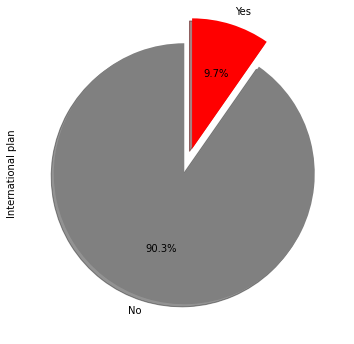

In [ ]:
dataset['International plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['gray','red'],
                               explode=[0,0.2]
                              )

In [ ]:
i1 = dataset['International plan'].unique()
i2 = dataset.groupby('International plan')['Churn'].mean()*100
i3 = dataset.groupby(['International plan'])['Total intl charge'].mean()
i4 = dataset.groupby(["Churn"])['Total intl minutes'].mean()

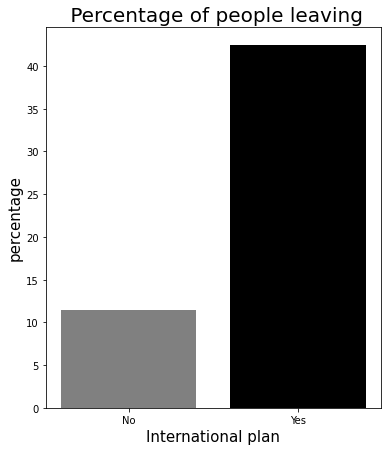

In [ ]:
plt.rcParams['figure.figsize'] = (6, 7)
 
plt.bar(i1,i2 , color=['gray','black'])
 
plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

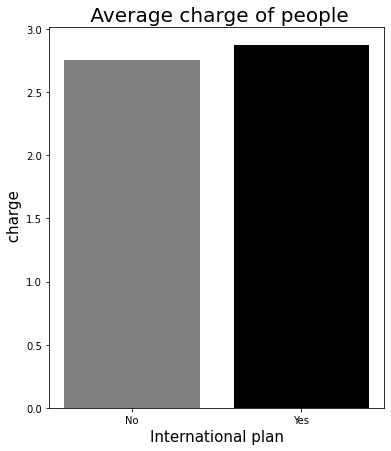

In [ ]:
plt.rcParams['figure.figsize'] = (6, 7)
 
plt.bar(i1,i3, color=['gray','black'])
plt.title(" Average charge of people", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' charge', fontsize = 15)
plt.show()

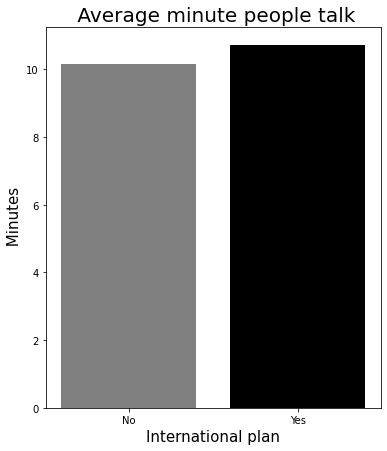

In [ ]:
plt.rcParams['figure.figsize'] = (6, 7)
 
plt.bar(i1,i4, color=['gray','black'])
plt.title(" Average minute people talk", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' Minutes', fontsize = 15)
plt.show()

**VOICE MAIL**

2411 dont have a voice mail plan

922 have a voice mail plan

Among those who dont have a voice mail 16.7 % people churn.

Whereas among those who have a voice mail plan only 8.7 % people churn.

**Hypothesis Based on Voice Mail**
* Customers sending less number of voicemails either as per their Requirement or There would be less Network Stability at that place for which they won't be able to send the voice message successfully.


***Customers  with the Voice Mail Plan tend to churn less frequently ***

In [ ]:
dataset['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: Number vmail messages, dtype: int64

In [ ]:
print(dataset.groupby(['Churn'])['Number vmail messages'].mean())

Churn
False    8.604561
True     5.115942
Name: Number vmail messages, dtype: float64


In [ ]:
print(dataset.groupby('Voice mail plan')['Number vmail messages'].mean())

Voice mail plan
No      0.000000
Yes    29.277657
Name: Number vmail messages, dtype: float64


In [ ]:
print(dataset['Voice mail plan'].value_counts())
print(" ")
print(dataset.groupby('Voice mail plan')['Churn'].value_counts())
print(" ")
print(dataset.groupby('Voice mail plan')['Churn'].mean())
print(" ")
print(" ")

No     2411
Yes     922
Name: Voice mail plan, dtype: int64
 
Voice mail plan  Churn
No               False    2008
                 True      403
Yes              False     842
                 True       80
Name: Churn, dtype: int64
 
Voice mail plan
No     0.167151
Yes    0.086768
Name: Churn, dtype: float64
 
 


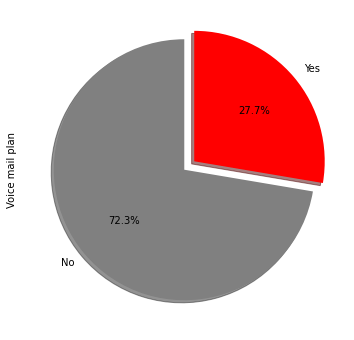

In [ ]:
 
dataset['Voice mail plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['gray','red'],
                               explode=[0,0.1]
                              )

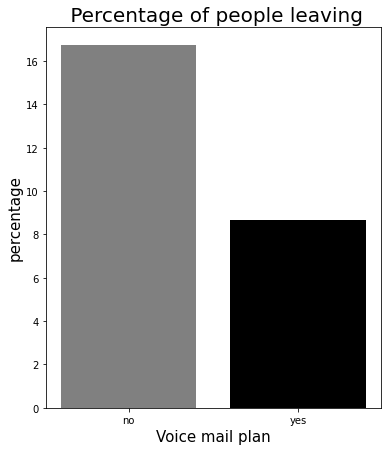

In [ ]:
plt.rcParams['figure.figsize'] = (6, 7)
 
cc1=list(['no','yes'])
cc2=dataset.groupby('Voice mail plan')['Churn'].mean()*100
plt.bar(cc1,cc2, color=['gray','black'])
 
plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

**OVERALL CALLS**

Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

In [ ]:
print(dataset.groupby(["Churn"])['Total day calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total day minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total day charge'].mean())
 
# 18% more min    18% more charge    no insight

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64
 
Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64
 
Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


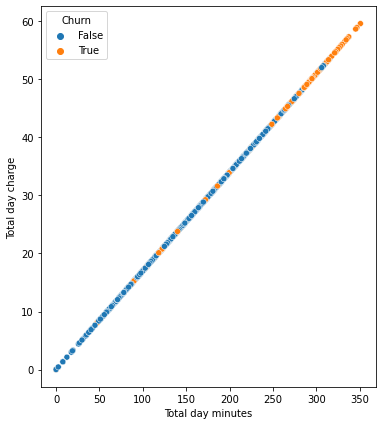

In [ ]:
cdd = sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=dataset)

In [ ]:
print(dataset.groupby(["Churn"])['Total eve calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total eve minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total eve charge'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64
 
Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64
 
Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


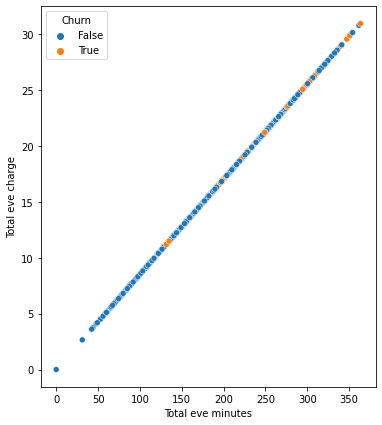

In [ ]:
cdd = sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=dataset)

In [ ]:
print(dataset.groupby(["Churn"])['Total night calls'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total night minutes'].mean())
print(" ")
print(dataset.groupby(["Churn"])['Total night charge'].mean())

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64
 
Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64
 
Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


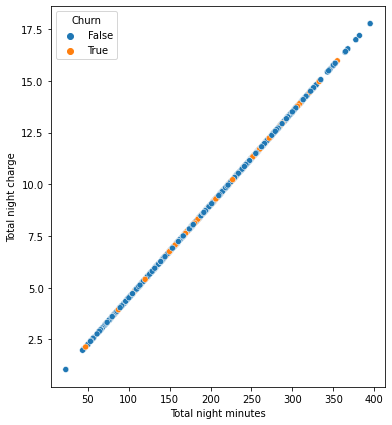

In [ ]:
cdd = sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=dataset)

In [ ]:
# Import pandas library 
import pandas as pd 
 
# initialize list of lists 
data1 = [['Total day minutes',175.17 , 206.91], ['Total day charge',29.78, 35.17]] 
 
#7.012,6.12,6.86
 
# Create the pandas DataFrame 
minutes_code1 = pd.DataFrame(data1, columns = ['Day', 'Not Churning',' Churning']) 
 
# print dataframe. 
minutes_code1

,Day,Not Churning,Churning
0,Total day minutes,175.17,206.91
1,Total day charge,29.78,35.17


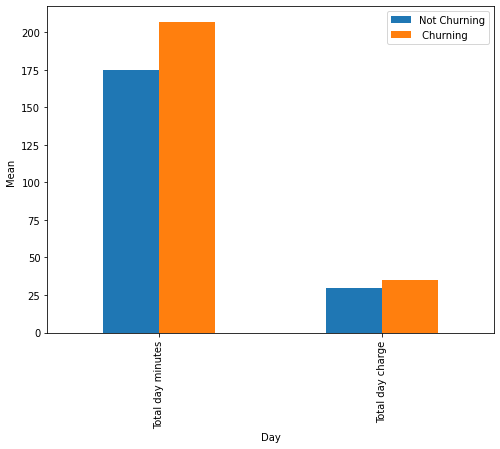

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
 
 
minutes_code1.plot(kind='bar', x='Day',ylabel='Mean  ')

In [ ]:
# Import pandas library 
import pandas as pd 
 
# initialize list of lists 
data2 = [ ['Total eve minutes',199.04, 212.41], ['Total night minutes',200.13,205.23]] 
 
#7.012,6.12,6.86
 
# Create the pandas DataFrame 
minutes_code2 = pd.DataFrame(data2, columns = ['Minutes', 'Not Churning',' Churning']) 
 
# print dataframe. 
minutes_code2

,Minutes,Not Churning,Churning
0,Total eve minutes,199.04,212.41
1,Total night minutes,200.13,205.23


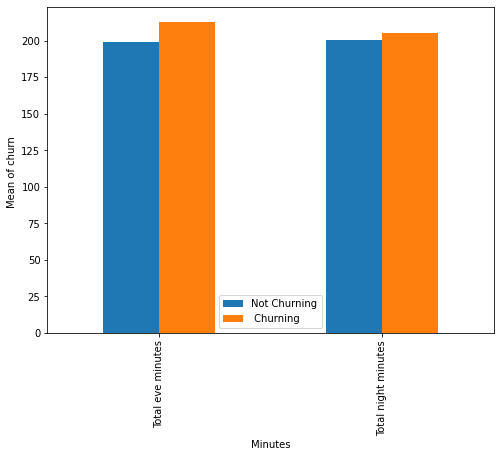

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
 
 
minutes_code2.plot(kind='bar', x='Minutes',xlabel='Minutes',ylabel='Mean of churn ')

In [ ]:
# Import pandas library 
import pandas as pd 
 
# initialize list of lists 
data3 = [ ['Total eve charge',16.91, 18.05], ['Total night charge',9,9.23]] 
 
#7.012,6.12,6.86
 
# Create the pandas DataFrame 
minutes_code3 = pd.DataFrame(data3, columns = ['Charge', 'Not Churning',' Churning']) 
 
# print dataframe. 
minutes_code3

,Charge,Not Churning,Churning
0,Total eve charge,16.91,18.05
1,Total night charge,9.00,9.23


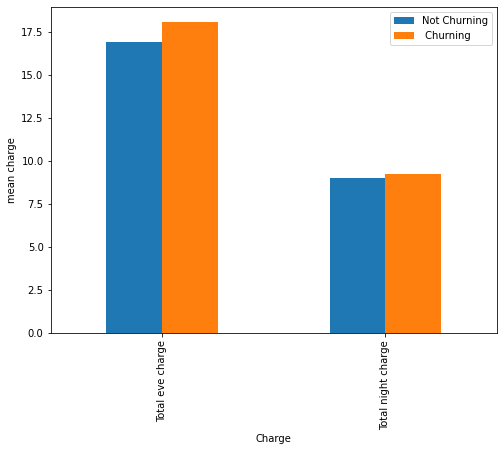

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
 
 
minutes_code3.plot(kind='bar', x='Charge',ylabel='mean charge')

**CUSTOMER SERVICE CALL**

The service calls of customers varies from 0 to 9 . 

Those customers who make more service calls they have a high probability of leaving.

As we can see from graph , customers with more then 5 service calls their probability of leaving is more then 50 %.

Hence customers who make more then 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

***Customers with four or more customer service calls churn more than four times as often as do the other customers***

In [ ]:
dataset['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
dataset.groupby(['Customer service calls'])['Churn'].mean()

Customer service calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: Churn, dtype: float64

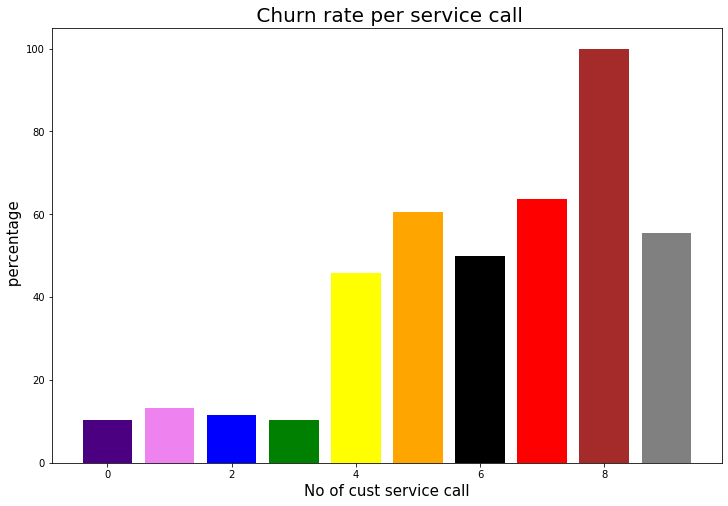

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
 
 
s1=list(dataset['Customer service calls'].unique())
s2=list(dataset.groupby(['Customer service calls'])['Churn'].mean()*100)
plt.bar(s1,s2, color = ['violet','indigo','b','g','yellow','orange','r','gray','black','brown'])
 
 
plt.title(" Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel(' percentage', fontsize = 15)
plt.show()

**Graphical Analysis** 

In [ ]:
numeric_features= dataset.describe().columns

In [ ]:
numeric_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

**Univariate Analysis**

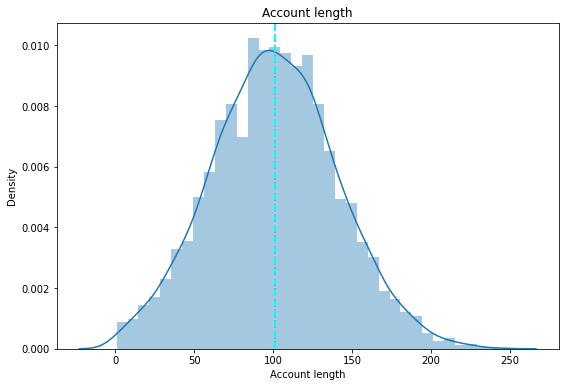

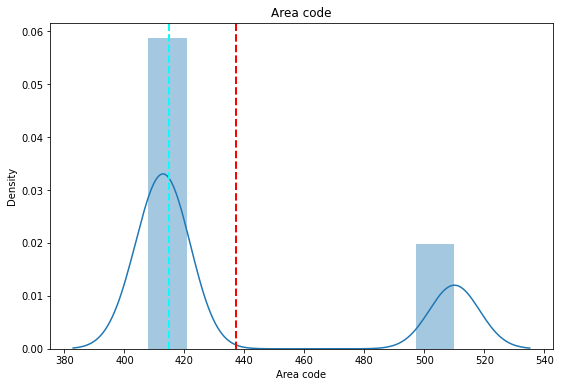

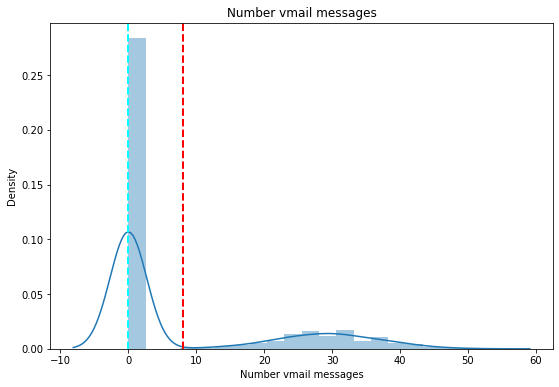

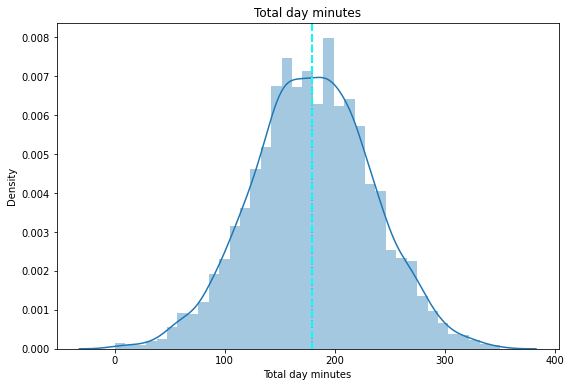

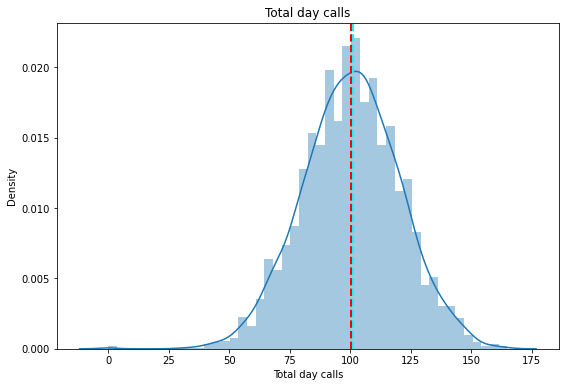

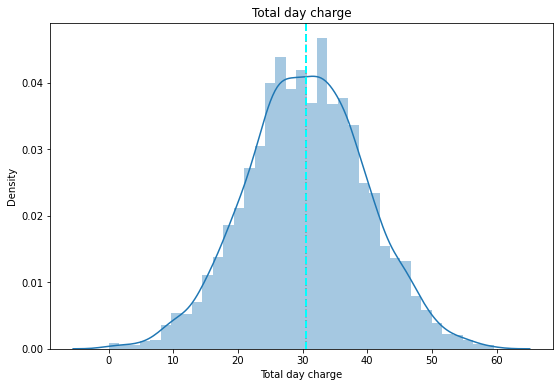

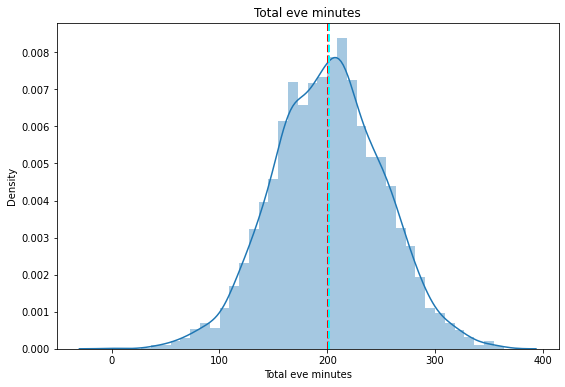

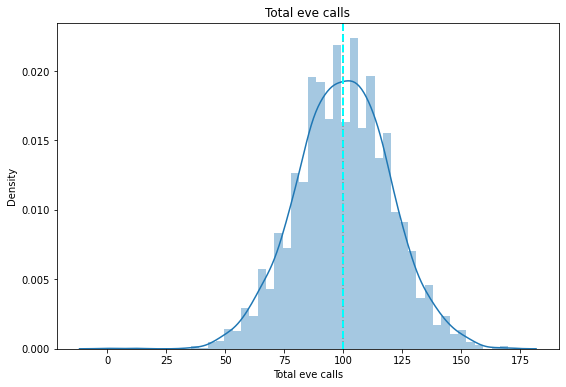

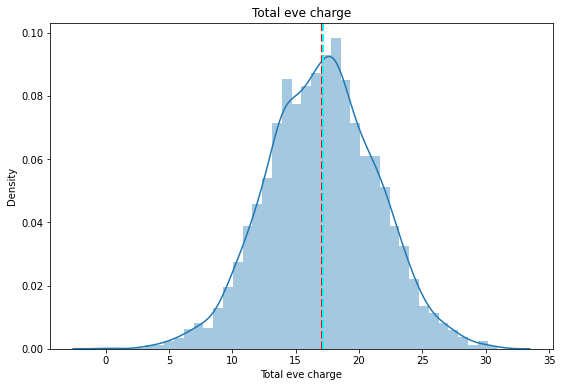

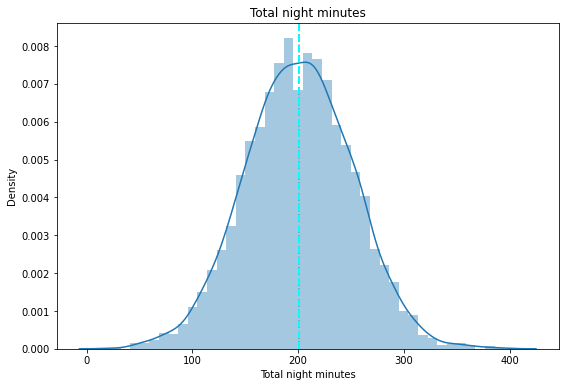

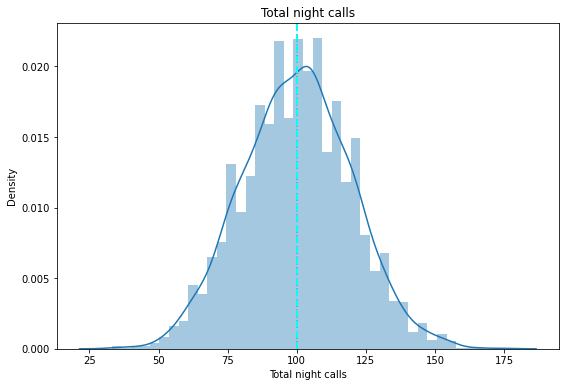

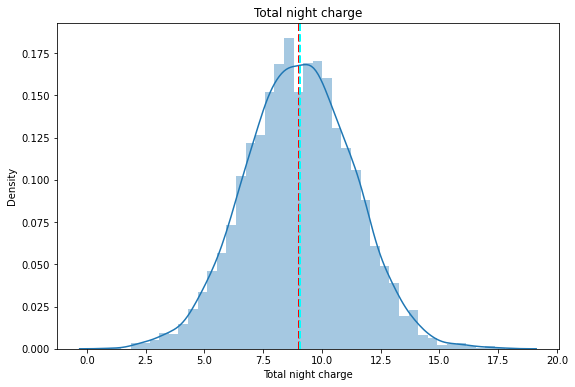

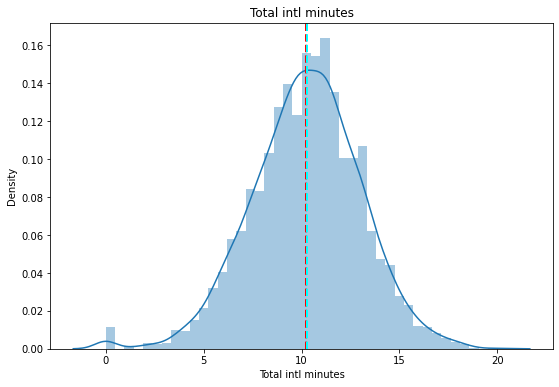

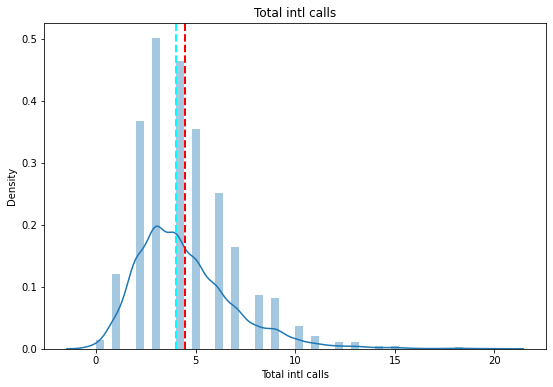

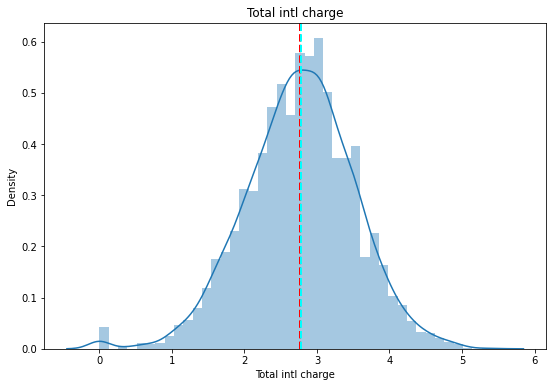

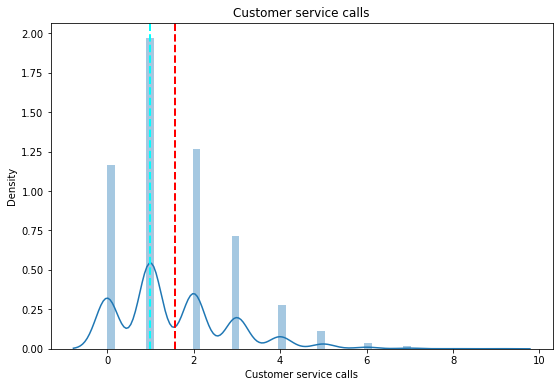

In [ ]:
#@Title Default Title Text
#plot a bar plot for each numerical feature count with Dist Plot
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='r', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

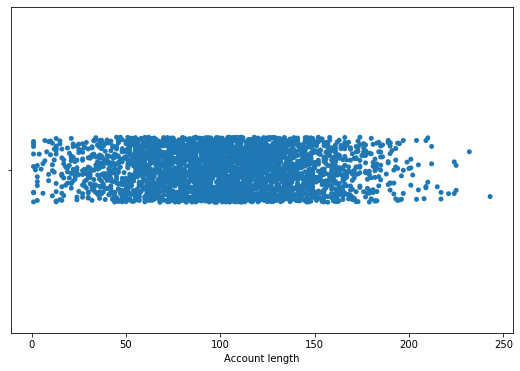

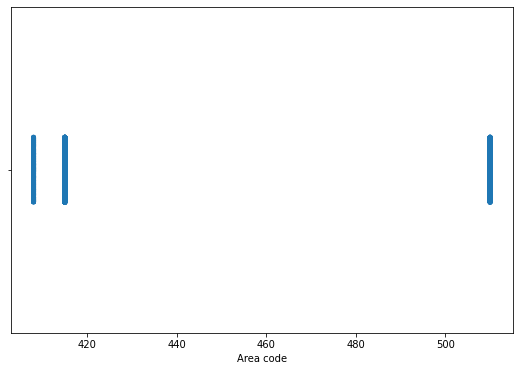

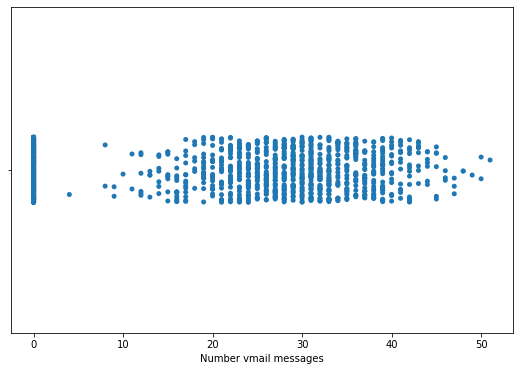

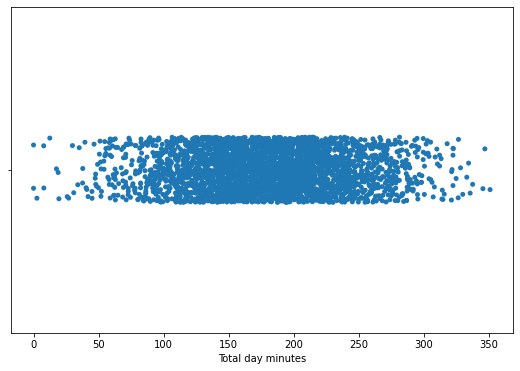

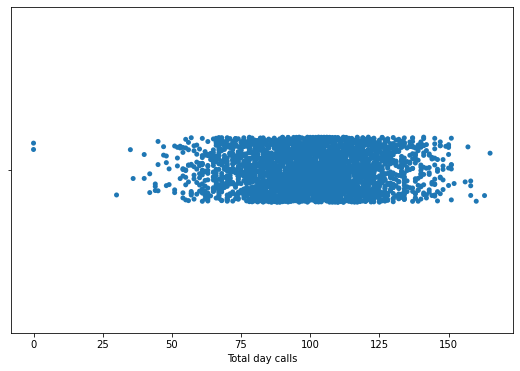

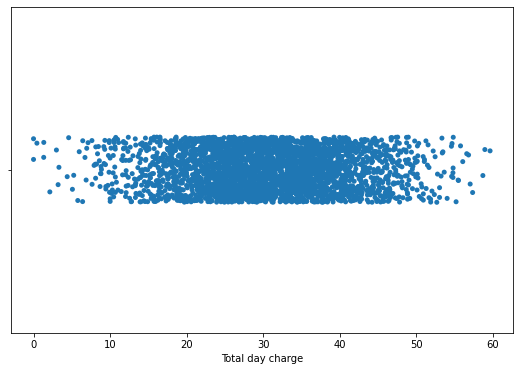

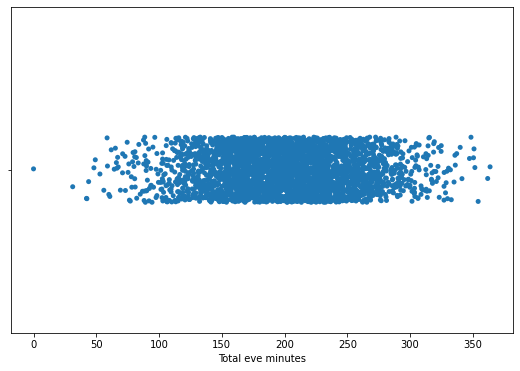

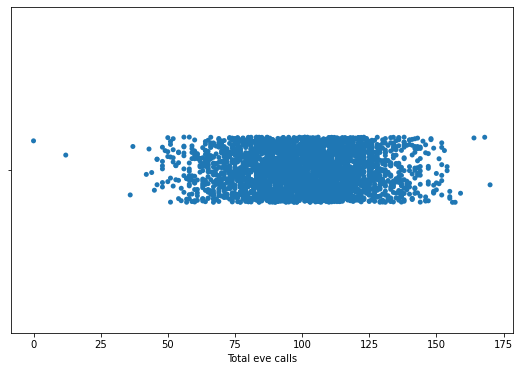

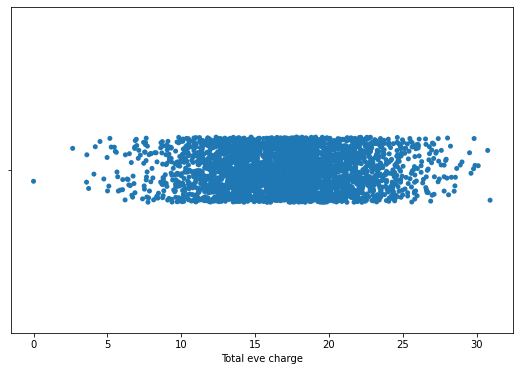

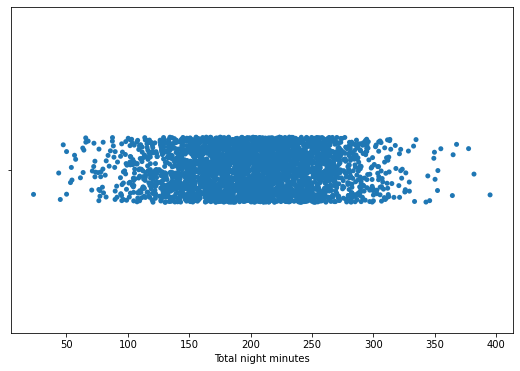

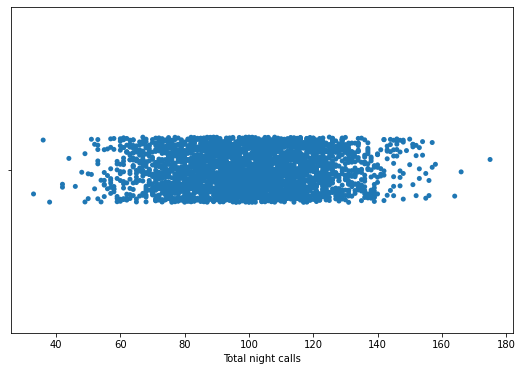

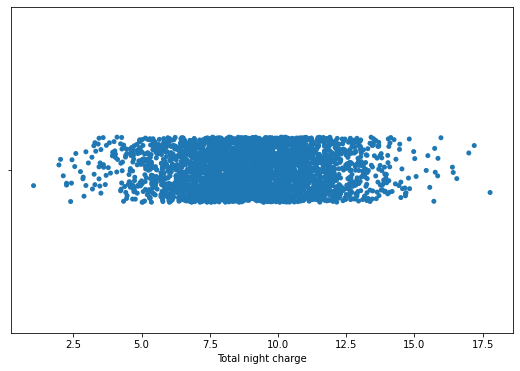

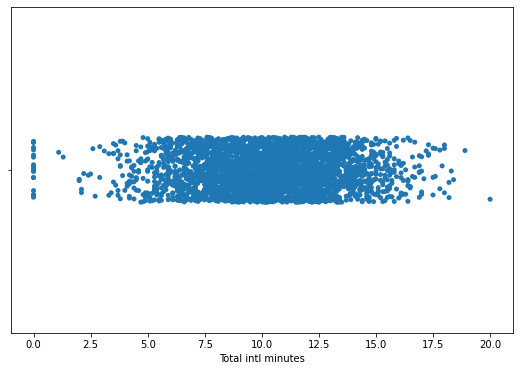

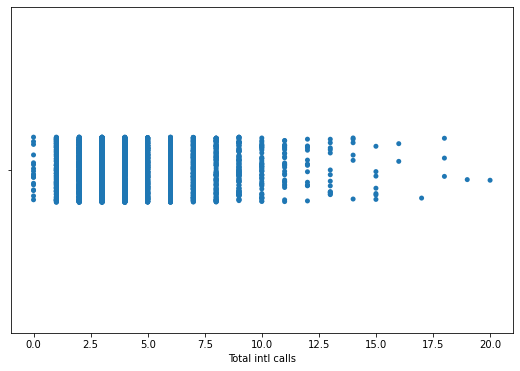

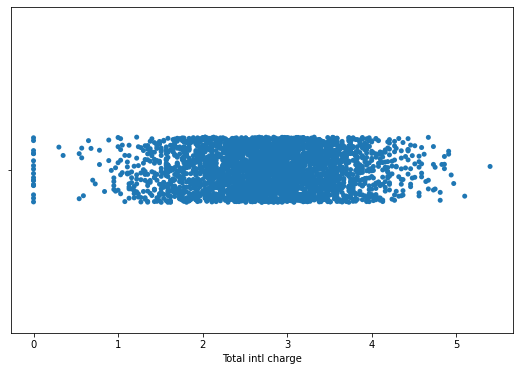

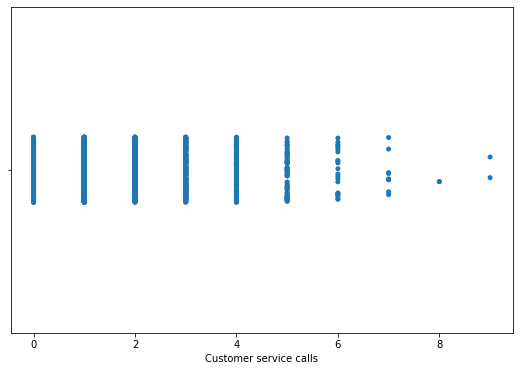

In [ ]:
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

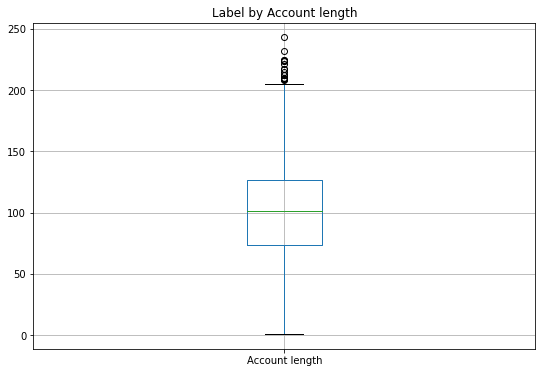

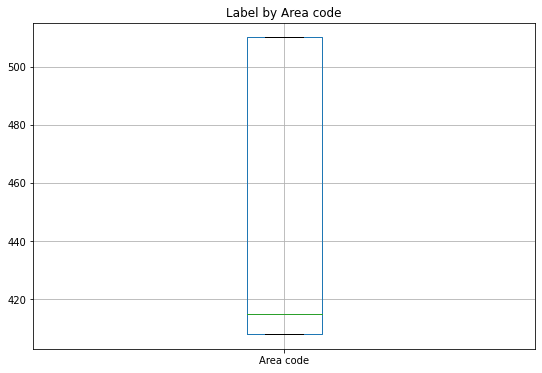

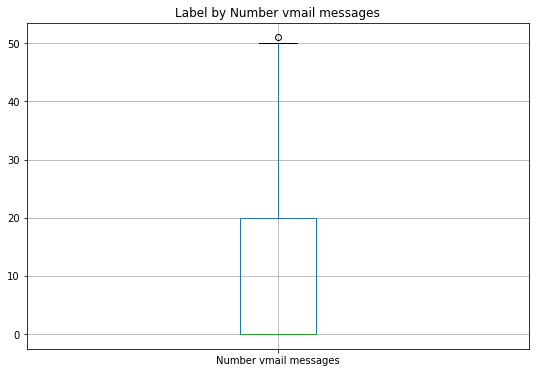

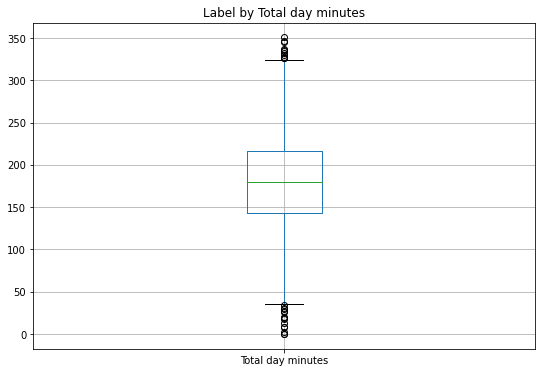

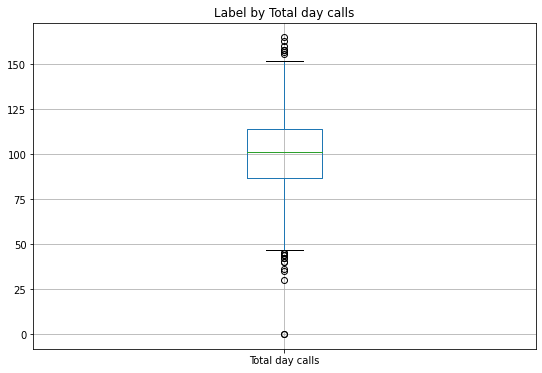

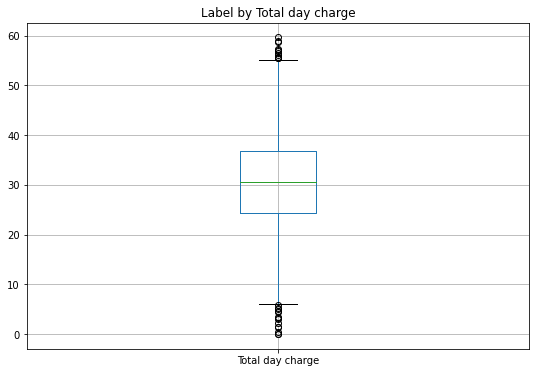

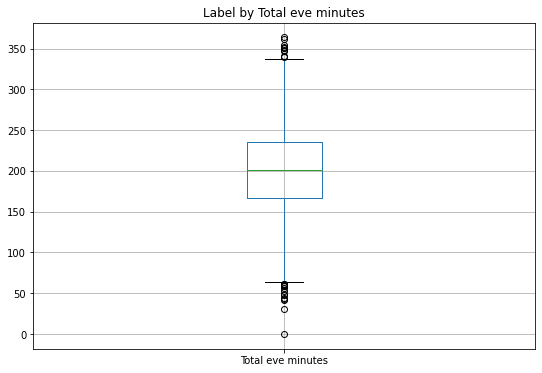

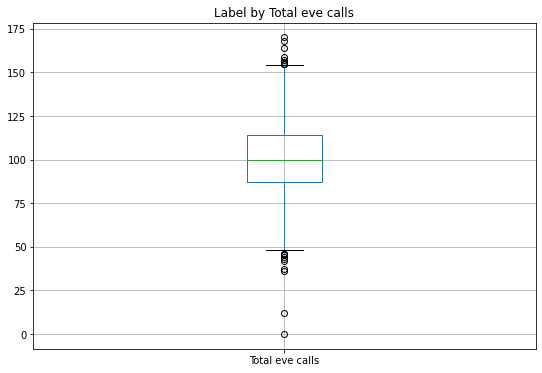

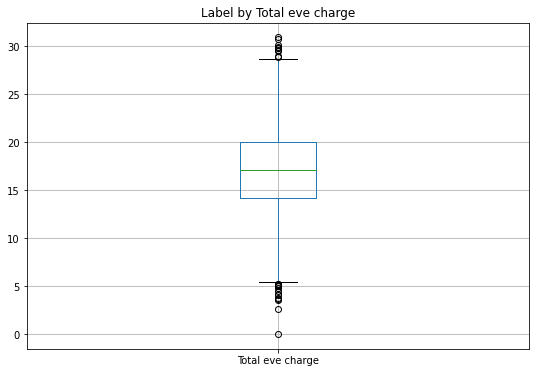

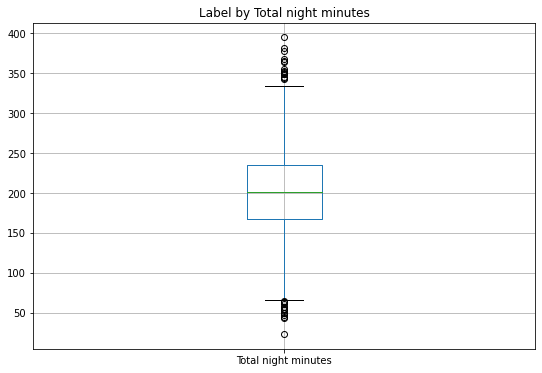

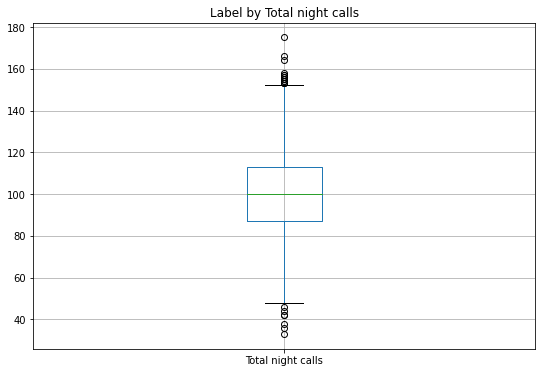

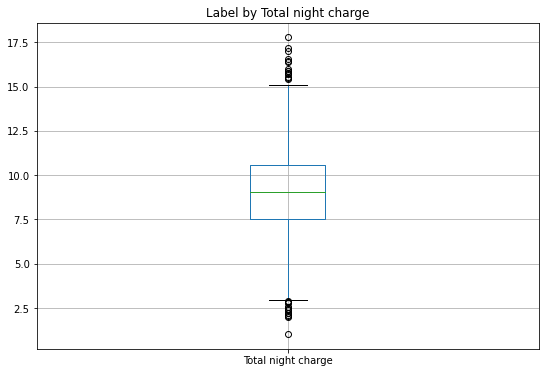

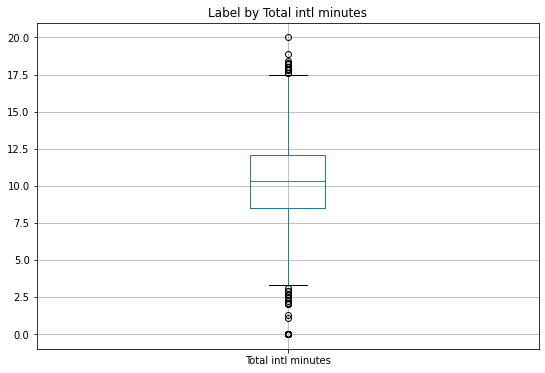

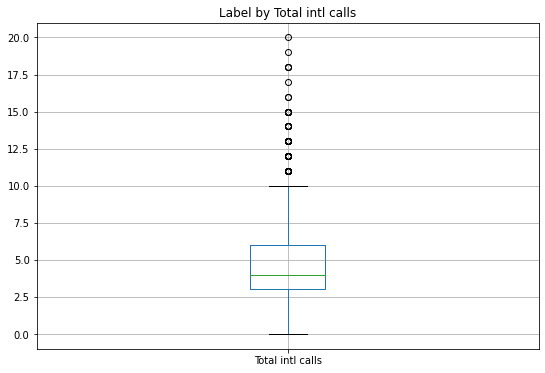

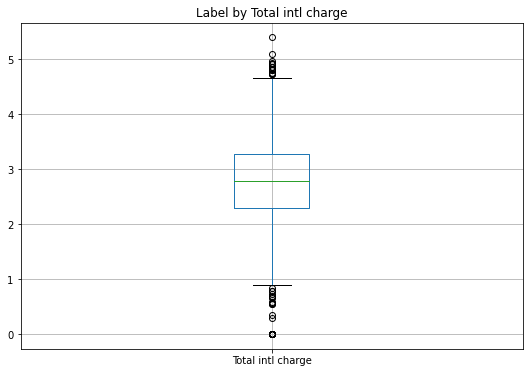

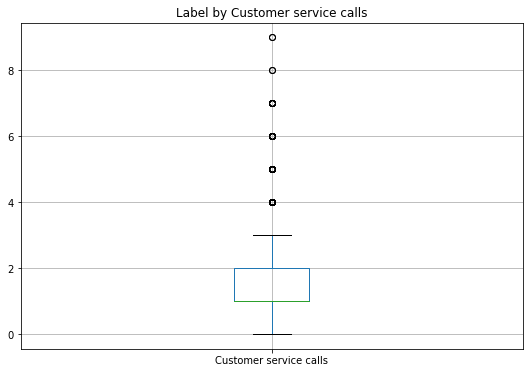

In [ ]:
# plot a boxplot for the label by each numerical feature  
 
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

**Bivariate Analysis**

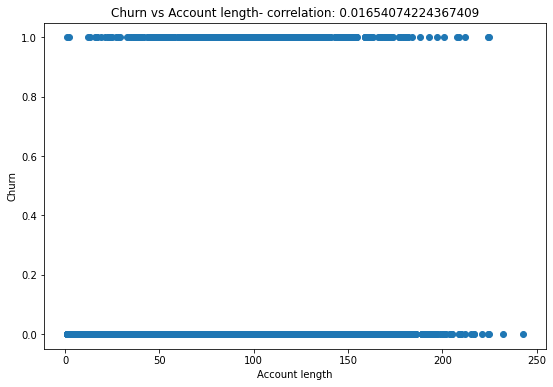

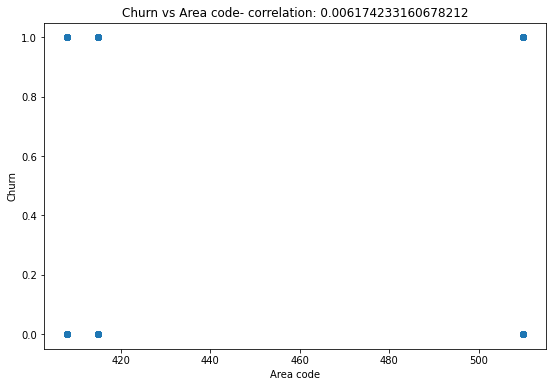

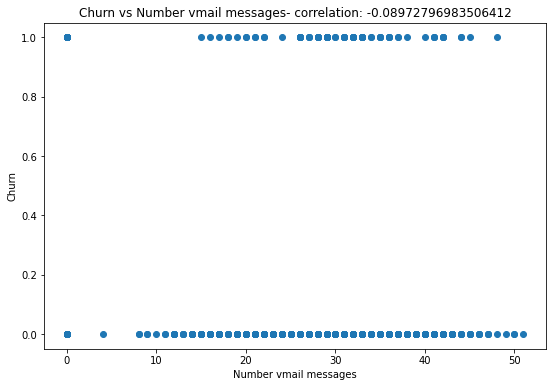

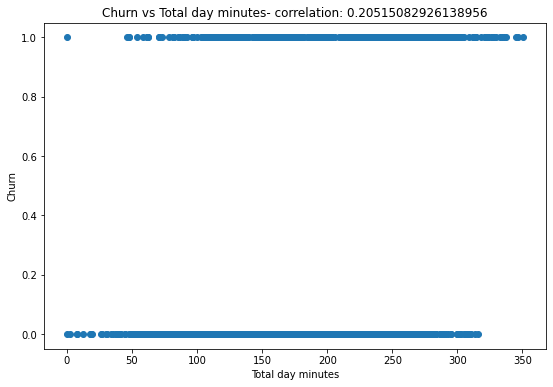

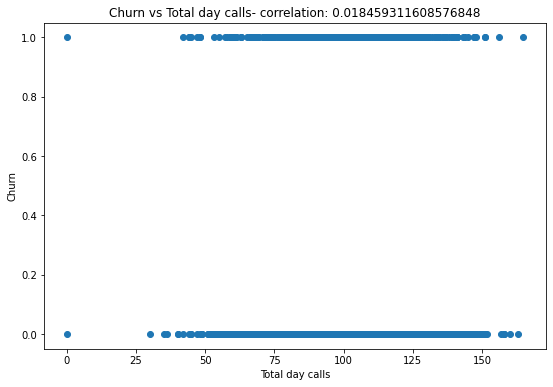

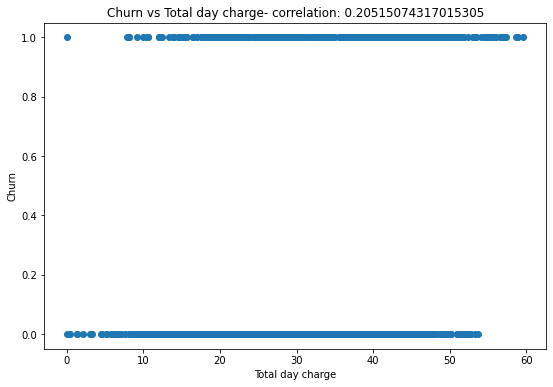

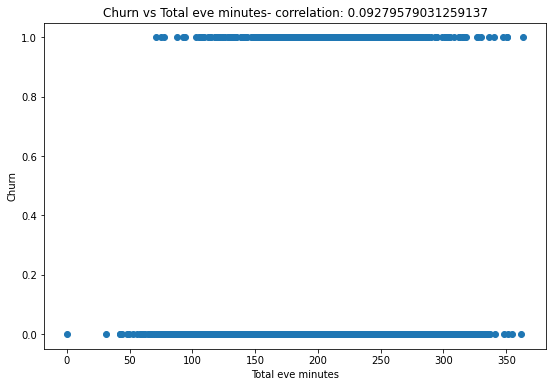

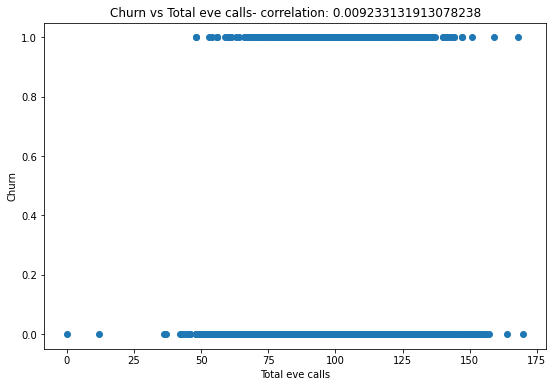

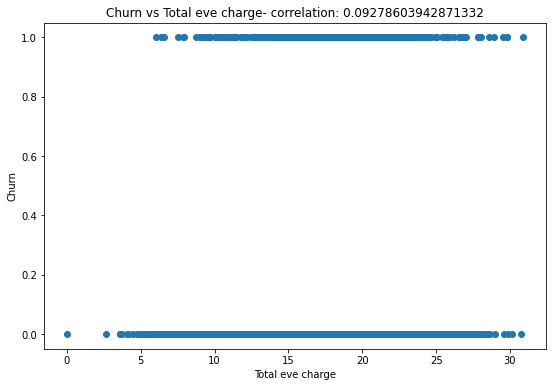

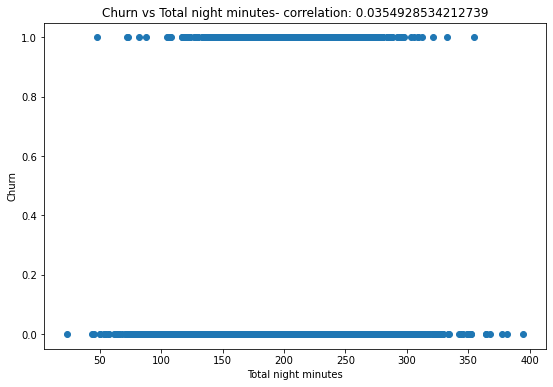

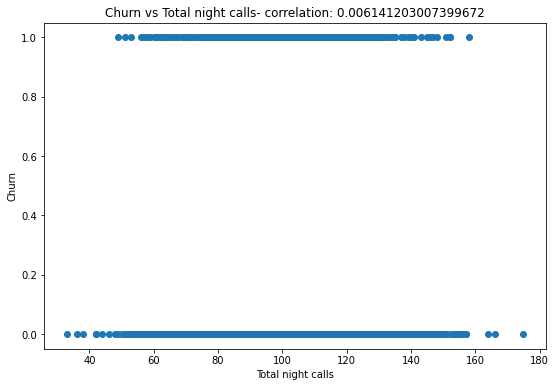

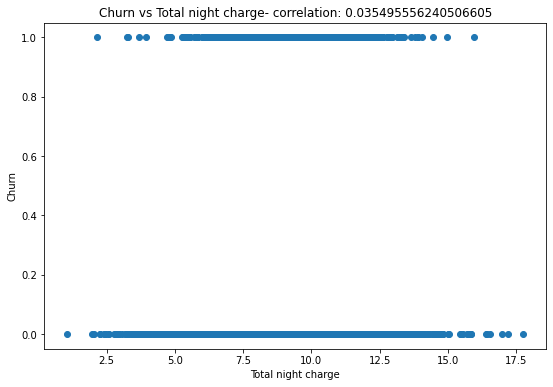

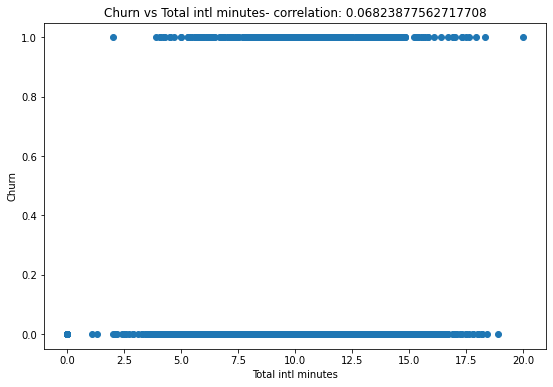

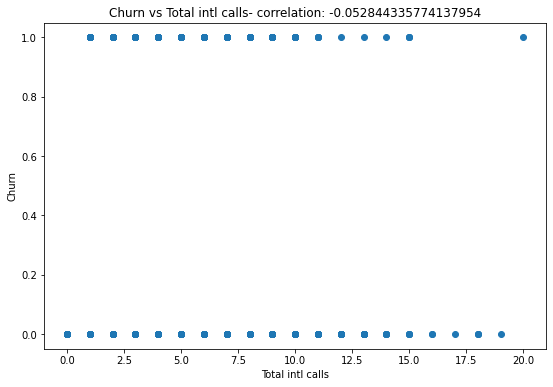

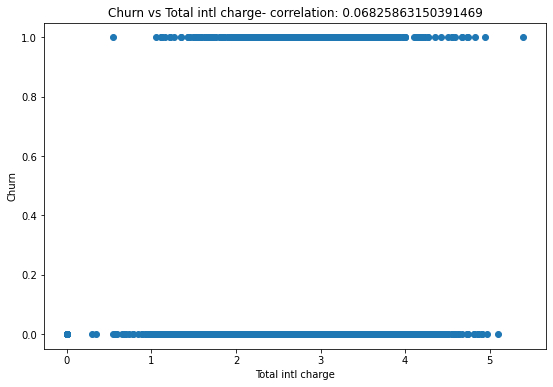

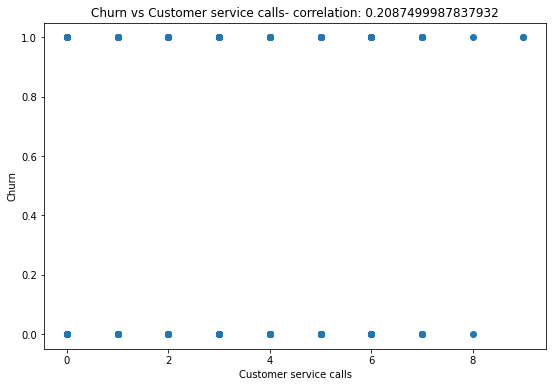

In [ ]:
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=dataset[col]
  label=dataset['Churn']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Churn')
  ax.set_title('Churn vs ' +col +'- correlation: '+ str(correlation))
  #z=np.polyfit(dataset[col], dataset['Modified_Churn'], 1)
  #y_hat = np.poly1d(z)(dataset[col])
 
  #plt.plot(dataset[col], y_hat, "r--", lw=1)

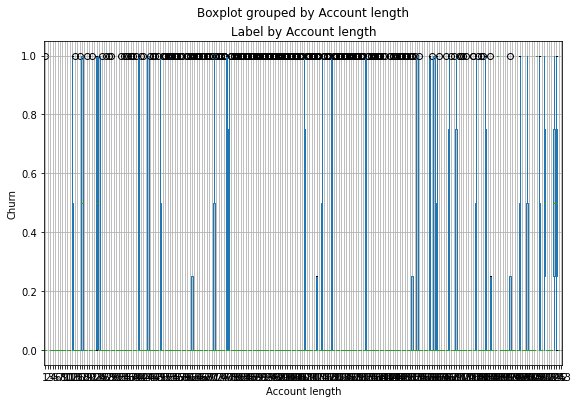

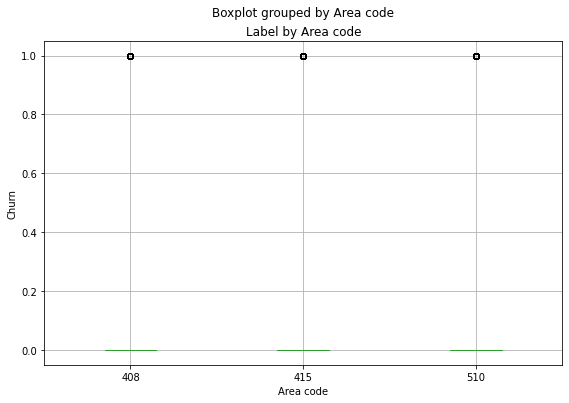

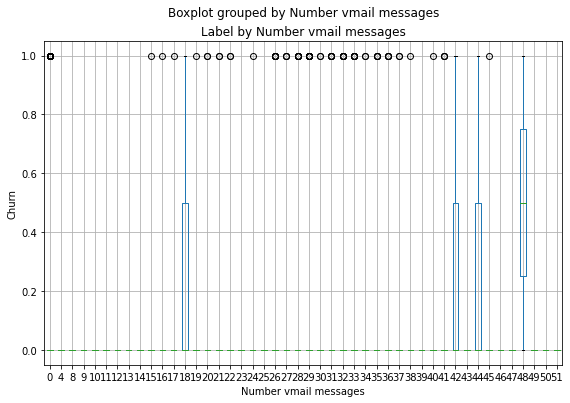

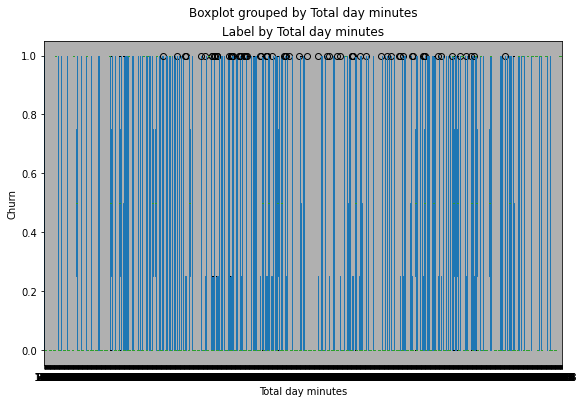

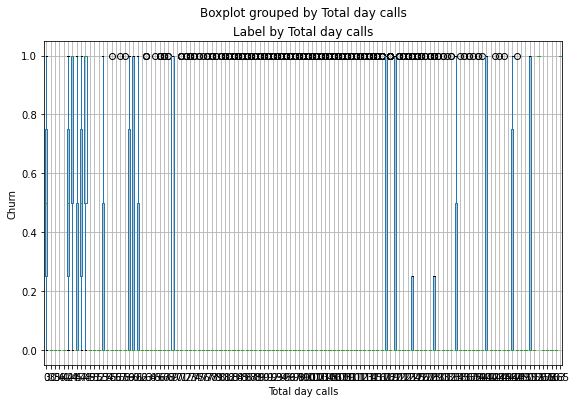

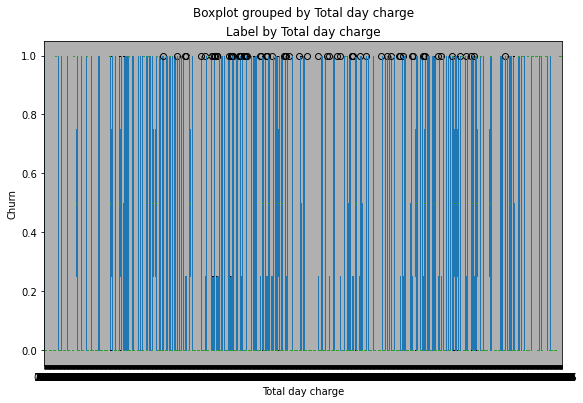

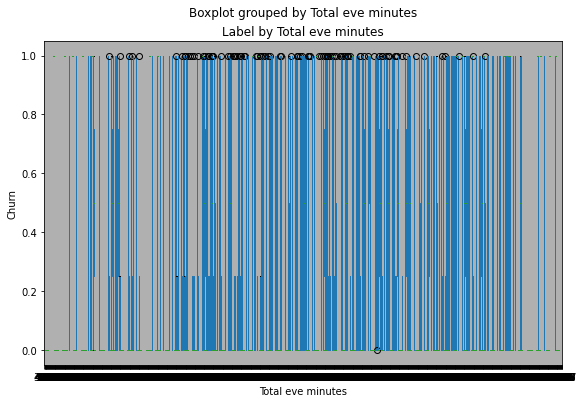

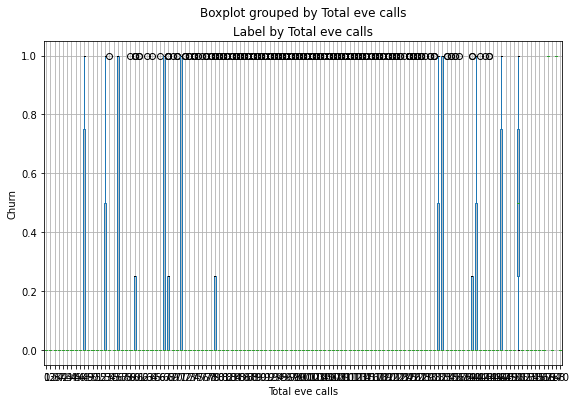

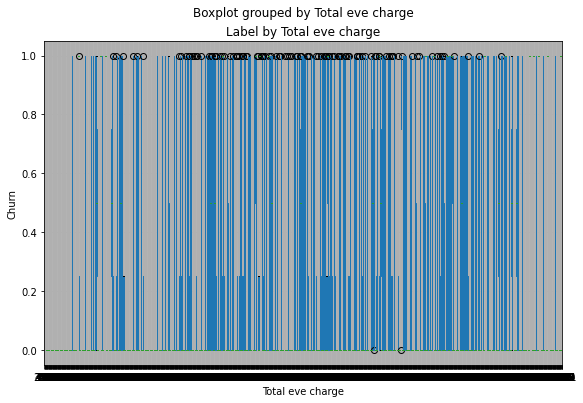

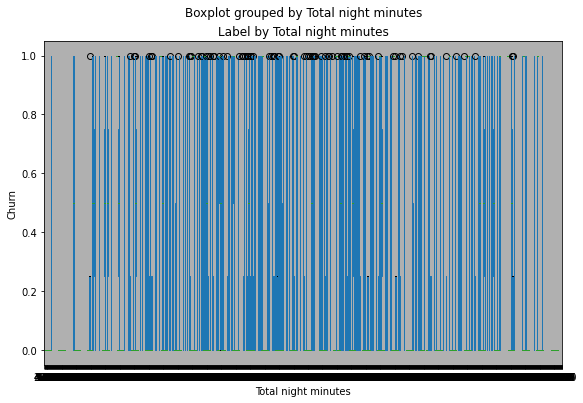

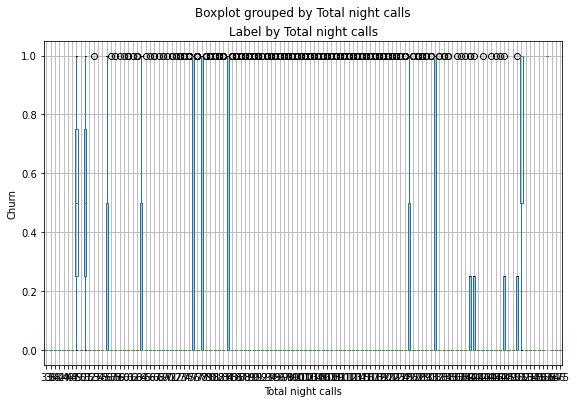

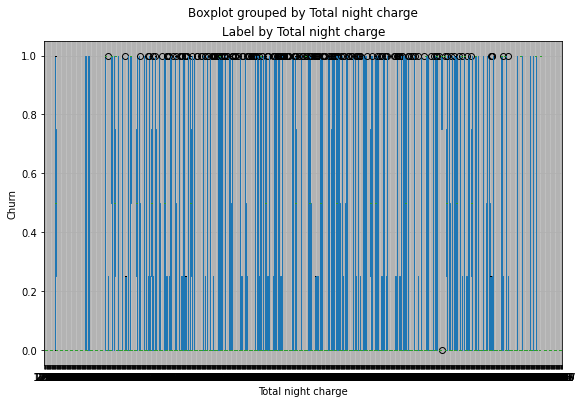

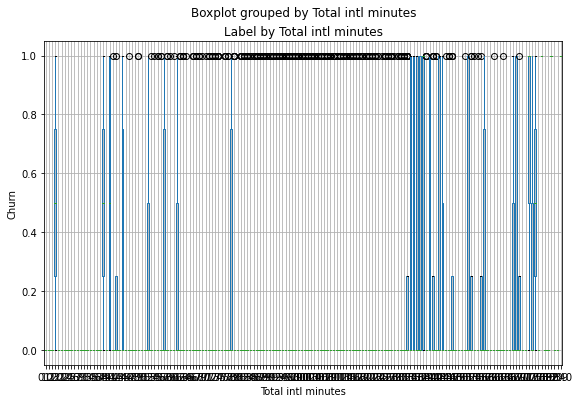

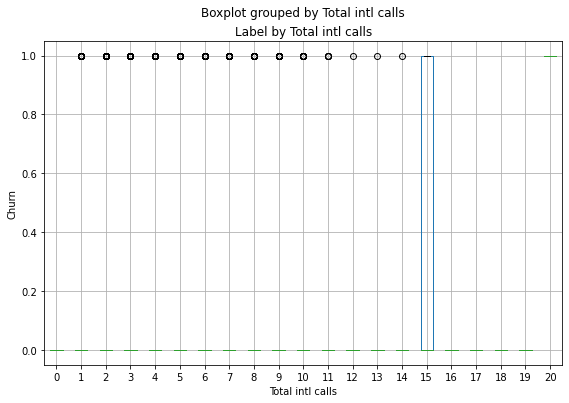

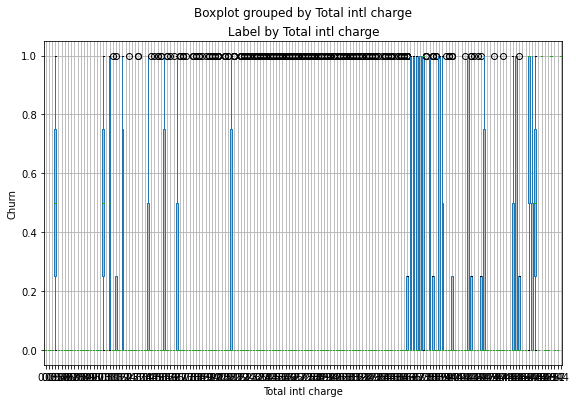

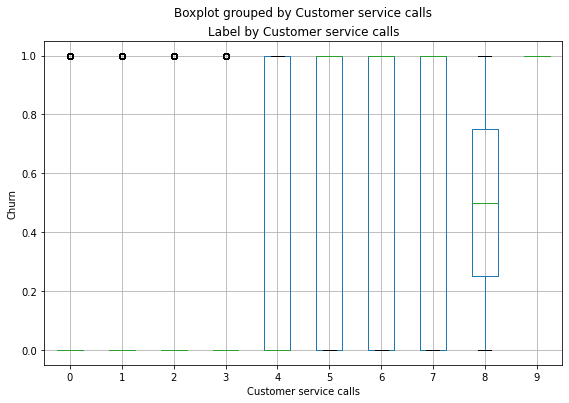

In [ ]:
# plot a boxplot for the label by each numerical feature  
 
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Churn', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Churn")
plt.show()

**Correlation**

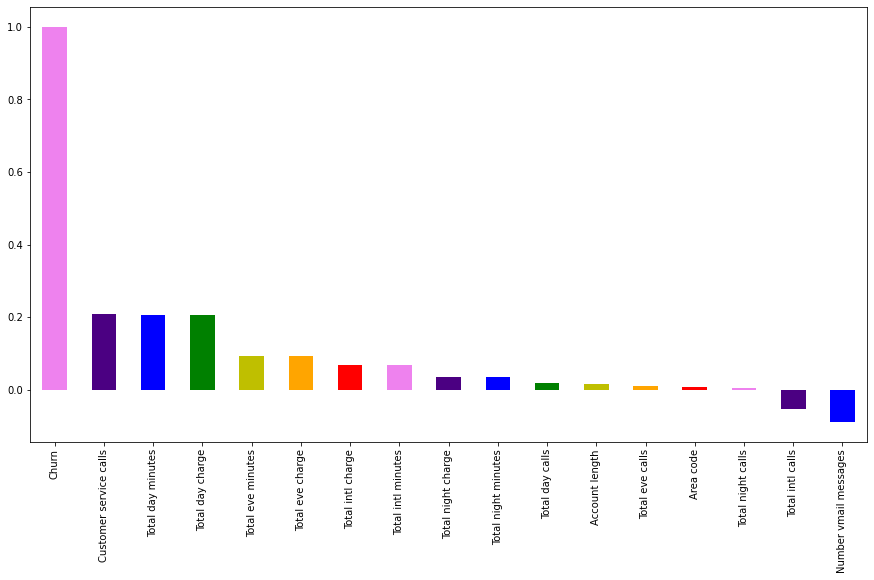

In [ ]:
# correlation
 
plt.figure(figsize=(15,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['violet','indigo','b','g','y','orange','r'])

Text(0.5, 1.0, 'Correlation Heatmap')

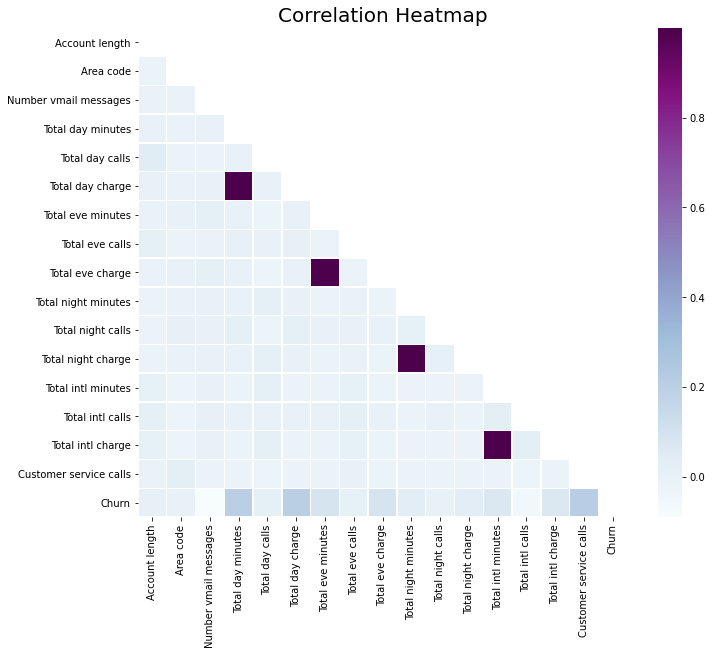

In [ ]:
corr=dataset.corr()
 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

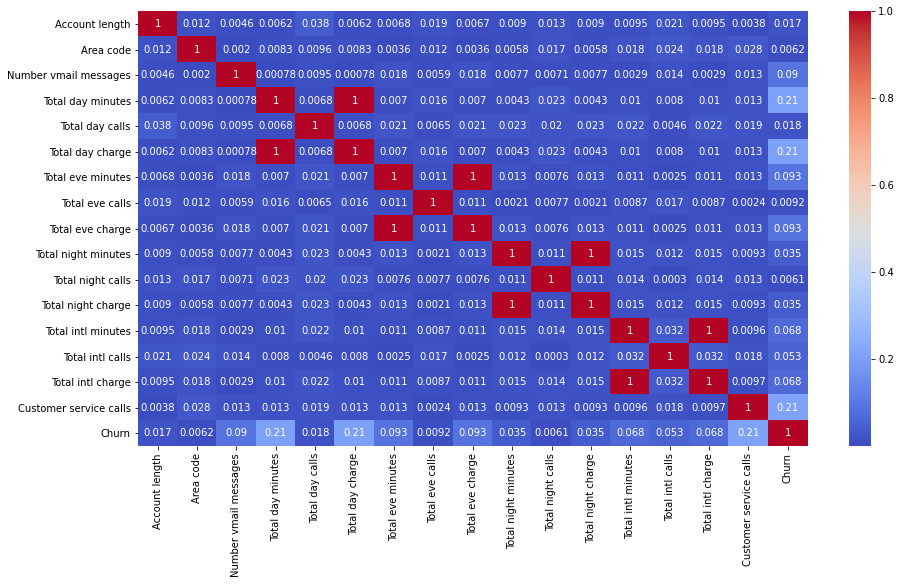

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.00,-0.01,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00,0.02
Area code,-0.01,1.00,-0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.02,-0.02,-0.02,0.03,0.01
Number vmail messages,-0.00,-0.00,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01,-0.09
Total day minutes,0.01,-0.01,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
Total day calls,0.04,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02,0.02
Total day charge,0.01,-0.01,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01,0.21
Total eve minutes,-0.01,0.00,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
Total eve calls,0.02,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00,0.01
Total eve charge,-0.01,0.00,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.09
Total night minutes,-0.01,-0.01,0.01,0.00,0.02,0.00,-0.01,-0.00,-0.01,1.00,0.01,1.00,-0.02,-0.01,-0.02,-0.01,0.04


## **PairPlot**

**Multivariate Analysis**

In [ ]:
sns.pairplot(dataset, size=3)

Output hidden; open in https://colab.research.google.com to view.

# **Solution to Reduce Customer Churn**

*	Modify International Plan as the charge is same as normal one.
*	Be proactive with communication.
*	Ask for feedback often.
*	Periodically throw Offers to retain customers.
*	Look at the customers facing problem in  the most churning states.
*	Lean into  best customers. 
*	Regular Server Maintenance.
*	Solving Poor Network Connectivity Issue.
*	Define a roadmap for new customers.
*	Analyze churn when it happens.
*	Stay competitive.


# **Conclusion**


•	The four charge fields are linear functions of the minute fields.

•	The area code field and/or the state field are anomalous, and can be omitted.

•	Customers with the International Plan tend to churn more frequently.

•	Customers with four or more customer service calls churn more than four times as often as do the other customers.

•	Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers.

•	There is no obvious association of churn with the variables day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

